<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Ignacio Zambrano &bull; 01-03-2026
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [ ]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import gdown
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs, make_circles # Creación de datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación
from sklearn.neighbors import KNeighborsClassifier
# Algoritmo SVC
from sklearn.svm import SVC

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

Importo el dataser

In [ ]:
url = "https://drive.google.com/uc?id=1zBu79031KDxexYedgjMUyAi1ixEn-5sY"
output = "nanotox_dataset.csv"

gdown.download(url, output, quiet=False)

# Cargamos el dataset
df = pd.read_csv(output)


Downloading...
From: https://drive.google.com/uc?id=1zBu79031KDxexYedgjMUyAi1ixEn-5sY
To: /content/nanotox_dataset.csv
100%|██████████| 44.1k/44.1k [00:00<00:00, 23.6MB/s]


Mostrar algunos datos

In [ ]:
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic


Información general

In [ ]:
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NPs         881 non-null    object 
 1   coresize    881 non-null    float64
 2   hydrosize   881 non-null    float64
 3   surfcharge  881 non-null    float64
 4   surfarea    881 non-null    float64
 5   Ec          881 non-null    float64
 6   Expotime    881 non-null    int64  
 7   dosage      881 non-null    float64
 8   e           881 non-null    float64
 9   NOxygen     881 non-null    int64  
 10  class       881 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 75.8+ KB
None


Descripción estadística

In [ ]:
print("\nDescripción estadística:")
display(df.describe())


Descripción estadística:


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,56.313280,513.781385,1.642111,42.074075,-4.018127,27.459705,39.651270,1.646050,1.308740
std,33.700297,346.601373,25.635780,47.111739,0.509806,19.534667,38.163289,0.089304,0.543581
min,7.500000,74.000000,-41.600000,7.000000,-5.170000,3.000000,0.000010,1.540000,1.000000
25%,32.000000,273.400000,-11.700000,15.000000,-4.160000,12.000000,10.000000,1.650000,1.000000
50%,45.300000,327.000000,-9.300000,24.100000,-3.890000,24.000000,25.000000,1.650000,1.000000
75%,86.000000,687.000000,29.400000,42.500000,-3.890000,24.000000,50.000000,1.650000,2.000000
max,125.000000,1843.000000,42.800000,210.000000,-1.510000,72.000000,300.000000,1.900000,3.000000


Escalamiento de variables numéricas

In [ ]:
# Seleccionamos solo variables numéricas (excluimos 'NPs' y 'class')
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nColumnas numéricas utilizadas:")
print(num_cols)

# Escalamiento (importante para SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

# Convertimos a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=num_cols)

print("\nPrimeras filas de los datos escalados:")
display(df_scaled.head())


Columnas numéricas utilizadas:
['coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen']

Primeras filas de los datos escalados:


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
0,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.039554,-0.403904,3.113097
1,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.039318,-0.403904,3.113097
2,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.036958,-0.403904,3.113097
3,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.013362,-0.403904,3.113097
4,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-0.908490,-0.403904,3.113097



### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


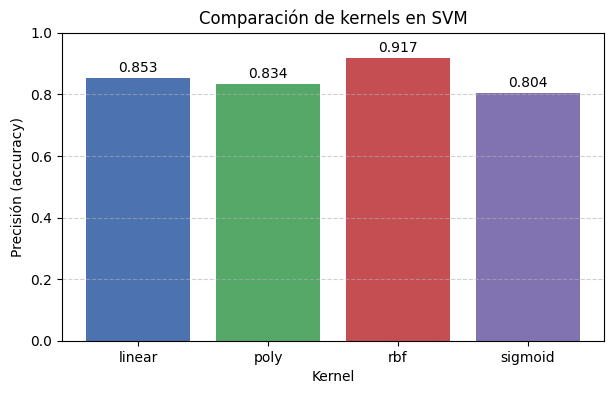

[('linear', 0.8528301886792453),
 ('poly', 0.8339622641509434),
 ('rbf', 0.9169811320754717),
 ('sigmoid', 0.8037735849056604)]

In [ ]:
# Variables predictoras y objetivo
X = df_scaled
y = df['class']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Kernels a evaluar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

# Entrenamiento y evaluación
for k in kernels:
    svm = SVC(kernel=k, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Colores para la gráfica
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']

# Gráfica de precisión por kernel
plt.figure(figsize=(7, 4))
bars = plt.bar(kernels, accuracies, color=colors)

plt.xlabel("Kernel")
plt.ylabel("Precisión (accuracy)")
plt.title("Comparación de kernels en SVM")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.01,
             f"{height:.3f}",
             ha='center', va='bottom')

plt.show()

# Resultados numéricos
list(zip(kernels, accuracies))


Un vez evaluados los distintos kernels: linear, polynomial, RBF y sigmoid comparando su precisión sobre el conjunto de prueba. El kernel RBF obtuvo la mayor precisión (≈ 0.917), superando claramente a los demás. Esto indica que los datos presentan relaciones no lineales, las cuales son mejor capturadas por el kernel RBF. Por esta razón, se selecciona RBF como el kernel más adecuado para este problema.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

Accuracy: 0.9169811320754717

Reporte de clasificación:
              precision    recall  f1-score   support

       Toxic       0.87      1.00      0.93       143
    nonToxic       1.00      0.82      0.90       122

    accuracy                           0.92       265
   macro avg       0.93      0.91      0.91       265
weighted avg       0.93      0.92      0.92       265



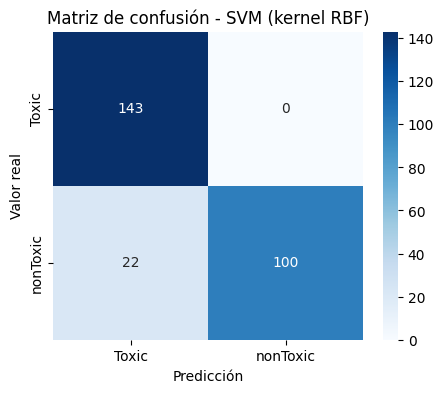

In [ ]:
# Variables predictoras y objetivo
X = df_scaled
y = df['class']

# División train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predicciones
y_pred = svm_rbf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_rbf.classes_,
            yticklabels=svm_rbf.classes_)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - SVM (kernel RBF)")
plt.show()


La matriz de confusión muestra que el modelo clasifica correctamente todos los casos Toxic, mientras que presenta algunos errores al clasificar instancias nonToxic como Toxic. El recall para Toxic es 1.00, lo que es especialmente relevante en un contexto de toxicidad, ya que minimiza falsos negativos.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

###Entrenamiento y evaluación k-NN

In [ ]:
# k óptimo obtenido previamente
k_opt = 2

knn = KNeighborsClassifier(n_neighbors=k_opt)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)

print("k-NN Accuracy:", acc_knn)
print("\nReporte de clasificación k-NN:")
print(classification_report(y_test, y_pred_knn))


k-NN Accuracy: 0.9660377358490566

Reporte de clasificación k-NN:
              precision    recall  f1-score   support

       Toxic       0.94      1.00      0.97       143
    nonToxic       1.00      0.93      0.96       122

    accuracy                           0.97       265
   macro avg       0.97      0.96      0.97       265
weighted avg       0.97      0.97      0.97       265



###Entrenamiento y evaluación SVM (RBF)

In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred_svm = svm_rbf.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)

print("SVM (RBF) Accuracy:", acc_svm)
print("\nReporte de clasificación SVM (RBF):")
print(classification_report(y_test, y_pred_svm))


SVM (RBF) Accuracy: 0.9169811320754717

Reporte de clasificación SVM (RBF):
              precision    recall  f1-score   support

       Toxic       0.87      1.00      0.93       143
    nonToxic       1.00      0.82      0.90       122

    accuracy                           0.92       265
   macro avg       0.93      0.91      0.91       265
weighted avg       0.93      0.92      0.92       265



###Tabla comparativa final

In [ ]:
comparison = pd.DataFrame({
    "Modelo": ["k-NN (k=2)", "SVM (RBF)"],
    "Accuracy": [acc_knn, acc_svm]
})

comparison


,Modelo,Accuracy
0,k-NN (k=2),0.966038
1,SVM (RBF),0.916981


Al comparar los modelos, k-NN (k=2) obtuvo una mayor precisión (96.6%) que SVM con kernel RBF (91.7%) en este conjunto de datos. Esto indica que, para esta base de nanopartículas, las relaciones locales entre observaciones son relevantes y bien capturadas por k-NN. Sin embargo, SVM sigue mostrando un buen desempeño y una mayor capacidad de generalización teórica, especialmente en problemas no lineales.